# Problem Set 6: Pandas basic data analysis

In this assignment, you're going to get your feet wet in data analysis and in Pandas.  First, decide on either the Excel (StarkData.xlsx) or CSV (StarkData.csv) format (either is fine) and then load one of these using the appropriate Pandas routine (they can take those "fname" URLs as the filename).  You should also be able to use that URL in a browser to view the file outside of Colab.

Here's the decoding of the columns:

- ID - subject unique identifier
- Set - Which stimulus set was used
- Age - Age of participant at study
- RAVLT - score on the Rey Auditory Verbal Learning Task
- pX_Y - Rate of response to a given trial type ('_' should be '|' but that's an OR and not allowed in variable names).
    - Responses (X): O, S, N = "old", "similar", and "new"
    - Trial types (Y): R, L, F = repeat, lure, and foil
    - pO_R = probability of saying "old" given the trial type is a repeat


1\) Compute two metrics from the data and store them in the data frame:
- LDI = pS_L - pS_F
- Recognition = pO_R - pO_F

2\) Use Pandas' routines to make scatter plots of:
- LDI vs. Age
- Recognition vs. Age
- RAVLT vs. Age
- LDI vs. RAVLT
- Recognition vs. RAVLT

The first one should look like this:

![LDI vs Age plot](https://github.com/celstark/n247data/raw/main/data/PSet6_output1.png)

3\) For each of these, figure the correlation coefficient (dataframe.corr) and give the graphs titles that say what they are and also include this r-value (e.g. "LDI vs. Age: r=-0.49")

4\) Finally, use the AgeGroup variable to split things out and make a box-plot of LDI scores by age group (one box-whisker setup that has, on a single panel, all four age groups).  
Did I mention you should make a boxplot ... by .. agegroup?

_Bonus_: Make your own column AgeDecade that has nice labels that break the Age column into 20s, 30s, ... 80s and have the plot use this. 

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import requests #extra
import io #extra

csvfname='https://raw.githubusercontent.com/celstark/n247data/main/data/StarkData.csv'
excelfname='https://github.com/celstark/n247data/raw/main/data/StarkData.xlsx'
# data = pd.read_csv(csvfname)
s = requests.get(csvfname).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [10]:
data

,ID,Set,Age,AgeGroup,RAVLT,pO_R,pO_L,pO_F,pS_R,pS_L,pS_F,pN_R,pN_L,pN_F
0,2942,D,26,1,15,0.8281,0.4531,0.0625,0.0469,0.4375,0.1719,0.0469,0.0781,0.7031
1,2946,C,21,1,14,0.8594,0.4219,0.0469,0.1094,0.5625,0.2344,0.0312,0.0156,0.7188
2,3000,D,20,1,13,0.9219,0.4688,0.0312,0.0781,0.3594,0.1094,0.0000,0.1562,0.8438
3,3354,D,20,1,14,0.8125,0.5000,0.0000,0.1562,0.4219,0.0781,0.0000,0.0469,0.9219
4,3362,C,21,1,12,0.9062,0.7344,0.0781,0.0625,0.2031,0.0156,0.0156,0.0625,0.9062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,4968,D,76,4,12,0.8438,0.4219,0.0156,0.0781,0.3906,0.0938,0.0625,0.1562,0.7812
94,4970,C,79,4,14,0.8281,0.8281,0.1875,0.0000,0.0156,0.0156,0.0156,0.0625,0.5938
95,5174,D,85,4,5,0.6094,0.5625,0.2656,0.0469,0.0469,0.0312,0.1406,0.2344,0.4688
96,5206,C,83,4,8,0.6562,0.4844,0.0469,0.2031,0.3906,0.0781,0.0469,0.0625,0.7969


In [11]:
''' 1) compute 2 metrics from the data and store them in the data frame:
- LDI = pS_L - pS_F
- Recognition = pO_R - pO_F '''

data['LDI'] = data['pS_L'] -  data['pS_F']
data['Recognition'] = data['pO_R'] -  data['pO_F']

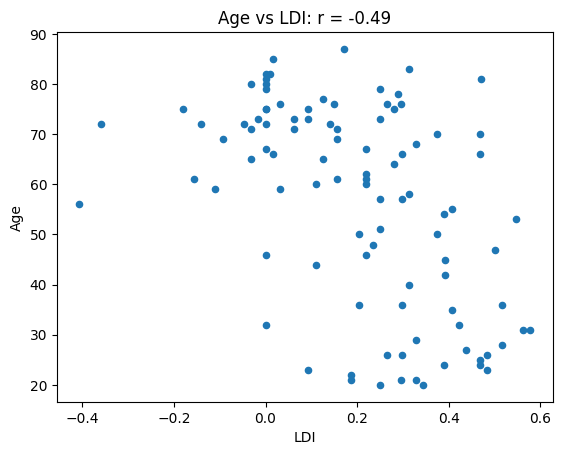

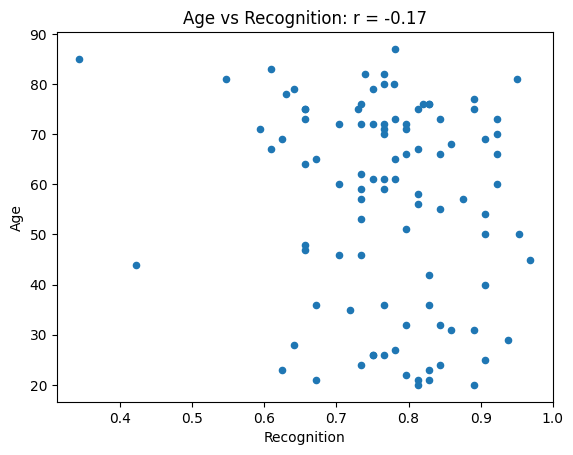

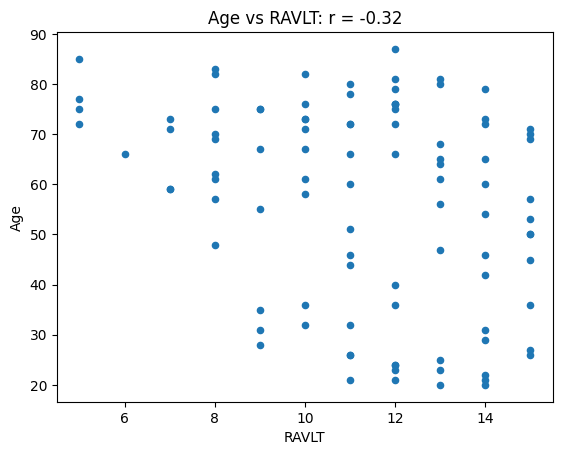

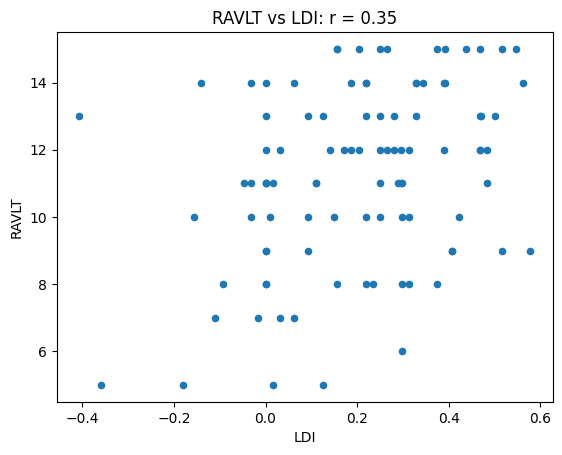

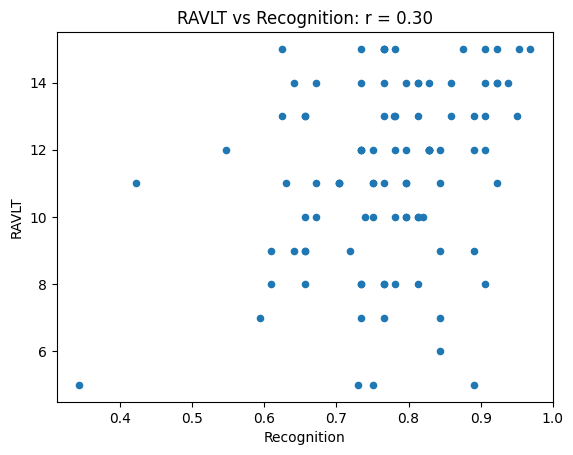

In [12]:
'''2 & 3) make scatter plots of:
- LDI vs. Age
- Recognition vs. Age
- RAVLT vs. Age
- LDI vs. RAVLT
- Recognition vs. RAVLT. Compute correlation coefficients + add titles. '''

def create_scatterplot(col_list): #input is 2 columns we are plotting
    corr = data[col_list].corr(numeric_only=True).iloc[0,1] #compute correlation coefficient 
    x_val, y_val = col_list
    scatter_plot = data.plot.scatter(x = x_val, y =y_val, title=f'{y_val} vs {x_val}: r = {corr:.2f}')
    return 


create_scatterplot(['LDI', 'Age'])
create_scatterplot(['Recognition', 'Age'])
create_scatterplot(['RAVLT', 'Age'])
create_scatterplot(['LDI', 'RAVLT'])
create_scatterplot(['Recognition', 'RAVLT'])



Text(0.5, 0.98, '')

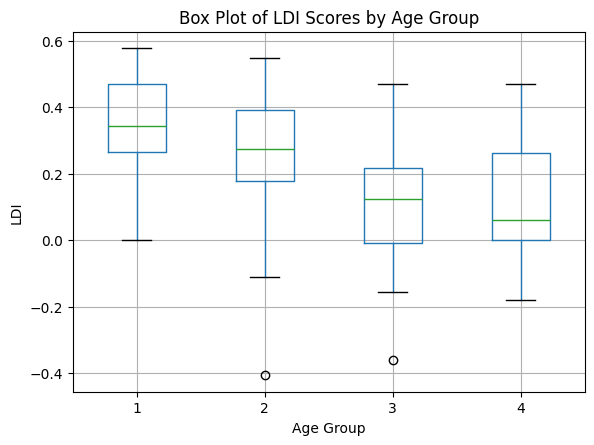

In [30]:
'''4) box-plot of LDI scores by age group ''' 
agegroup_LDI_boxplot = data.boxplot(column = 'LDI', by = 'AgeGroup')
agegroup_LDI_boxplot.set_title("Box Plot of LDI Scores by Age Group")
agegroup_LDI_boxplot.set_ylabel("LDI")
agegroup_LDI_boxplot.set_xlabel("Age Group")
plt.suptitle('')

Text(0.5, 0.98, '')

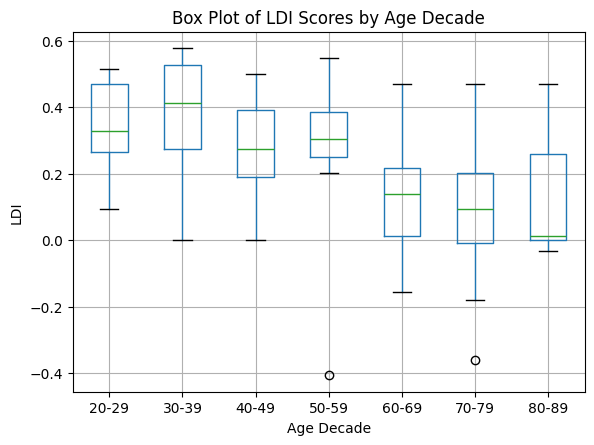

In [ ]:
'''Bonus: break age into decades'''

data['AgeDecade'] = pd.cut(data['Age'], 7, labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])


'''4) box-plot of LDI scores by age decade ''' 
agedecade_LDI_boxplot = data.boxplot(column = 'LDI', by = 'AgeDecade')
agedecade_LDI_boxplot.set_title("Box Plot of LDI Scores by Age Decade")
agedecade_LDI_boxplot.set_ylabel("LDI")
agedecade_LDI_boxplot.set_xlabel("Age Decade")
plt.suptitle('')


In [ ]:
#look at pd.cut 